In [51]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

mydata=mypd.read_csv("Mult_Reg_Yield.csv")
mydata

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [52]:
mydata.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [53]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [54]:
x = mydata.iloc[:,0:2]
x

,Time,Temperature
0,130,190
1,174,176
2,134,205
3,191,210
4,165,230
5,194,192
6,143,220
7,186,235
8,139,240
9,188,230


In [55]:
y=mydata.iloc[:,2:]
y

,Yield
0,35.0
1,81.7
2,42.5
3,98.3
4,52.7
5,82.0
6,34.5
7,95.4
8,56.7
9,84.4


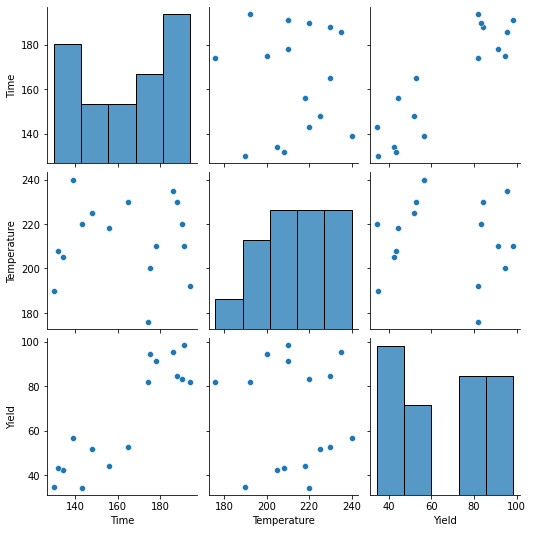

In [56]:
mysb.pairplot(mydata)
myplot.show()

In [57]:
mymodel = LinearRegression()
mymodel

LinearRegression()

In [58]:
mymodel= mymodel.fit(x,y)
mymodel

LinearRegression()

In [59]:
pred=mymodel.predict(x)
pred

array([[37.71122898],
       [78.47777573],
       [40.37274675],
       [91.69885237],
       [66.85676605],
       [95.57252226],
       [47.5647076 ],
       [85.56368144],
       [42.65657086],
       [87.69680424],
       [77.84332562],
       [59.47223785],
       [90.15087261],
       [79.91970034],
       [38.36800217],
       [51.77420512]])

In [60]:
mymodel.coef_

array([[ 0.90608862, -0.06418911]])

In [61]:
mymodel.intercept_


array([-67.8843597])

In [62]:
rsn = mymodel.score(x,y)

In [63]:
rsn
round(rsn*100,2)

80.64

In [64]:
mse = mean_squared_error(y,pred)
mse

102.00508614219636

In [65]:
import math as mymath
rmse = mymath.sqrt(mse)
rmse

10.099756736783137

In [66]:
res=y-pred
res

,Yield
0,-2.711229
1,3.222224
2,2.127253
3,6.601148
4,-14.156766
5,-13.572522
6,-13.064708
7,9.836319
8,14.043429
9,-3.296804


In [67]:
pred=mypd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,37.711229
1,78.477776
2,40.372747
3,91.698852
4,66.856766
5,95.572522
6,47.564708
7,85.563681
8,42.656571
9,87.696804


In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)

LinearRegression()

In [1]:
myplot.scatter(x,y,color='blue')
myplot.plot(x,lin2.predict(poly.fit_transform(x)),color = 'red')
myplot.title('Polynomial regression')
myplot.xlabel('Temperature')
myplot.ylabel('Pressure')

myplot.show()

NameError: name 'myplot' is not defined